In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import mpmath as mp
import math
import numpy as np
import scipy

import LGF_funcs as LGF

In [24]:
import time

c = 0.3
alpha = 0.5
n_max = 100
m_max = 100

n_samples = n_max*m_max

#alpha_vec = np.random.choice(np.linspace(0.001, 1, 1000), n_samples, replace=True)
#c_vec = np.random.choice(np.linspace(0.01, 0.05, 1000), n_samples, replace=True)
#m_vec = np.random.choice(range(500), n_samples, replace=True)
#n_vec = np.random.choice(range(500), n_samples, replace=True)


#bessel_int_level = np.arange(50, 504, 50)
bessel_int_level = np.arange(50, 304, 50)
bessel_int_level_title = np.arange(50, 304, 50)
#bessel_int_level = bessel_int_level_raw[:8]
#bessel_int_level = np.append(bessel_int_level, np.Infinity)
n_int_level = len(bessel_int_level)
bessel_mat = np.zeros((n_samples, n_int_level))
trap_vec = np.zeros(n_samples)
fft_vec = np.zeros(n_samples)
trap_true_vec = np.zeros(n_samples)

# Compute true values
eps = 1e-10
t0 = time.time()
for i in range(n_samples):
    m = int(i/n_max)
    n = i - m*n_max

    eta_n = c**2/alpha * (1 - 0.01)**2
    M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
    gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

    N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)

    #trap_true_vec[i] = eval_lgf(c, alpha, n, m, N_trap*10)
    trap_true_vec[i] = LGF.eval_lgf(c, alpha, n, m, N_trap*2)
    #trap_true_vec[i] = eval_lgf_appell(c, n, m, alpha)
t1 = time.time()
t_true = t1 - t0

print(t_true)

# Compute trapezoidal rule values
n_times_trap = 10
t0 = time.time()
for j in range(n_times_trap):
    for i in range(n_samples):
        m = int(i/n_max)
        n = i - m*n_max

        eta_n = c**2/alpha * (1 - 0.01)**2
        M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
        gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

        N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)
        

        trap_vec[i] = LGF.eval_lgf(c, alpha, n, m, N_trap)

t1 = time.time()
t_trap = (t1 - t0)/n_times_trap

# Compute FFT trapezoidal rule values
n_times_fft = 1000
t0 = time.time()
for j in range(n_times_fft):
    for i in range(m_max):
        m = i
        idx_begin = i*n_max

        eta_n = c**2/alpha * (1 - 0.01)**2
        M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
        gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

        #N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)

        N_trap = max(int(n_max),int(math.ceil(0.5/gamma_eta_n*np.log(2*M_eta_n/eps)) + n_max/2))
        
        res = LGF.eval_lgf_rfft(c, alpha, m, N_trap)
        fft_vec[idx_begin:(idx_begin+n_max)] = res[:n_max]

t1 = time.time()
t_fft = (t1 - t0)/n_times_fft


t0 = time.time()
for i in range(n_samples):
    m = int(i/n_max)
    n = i - m*n_max

    eta_n = c**2/alpha * (1 - 0.01)**2
    M_eta_n = 1/2/np.sqrt(c**2/alpha - eta_n)
    gamma_eta_n = np.log(1 + eta_n/2 + np.sqrt((1 + eta_n/2)**2 - 1))

    N_trap = int(math.ceil(1./gamma_eta_n*np.log(2*M_eta_n/eps)) + n)
    

t1 = time.time()
t_non = t1 - t0

time_vec = []


for j, v in enumerate(bessel_int_level):
    print(j)
    t0 = time.time()
    for i in range(n_samples):
        m = int(i/n_max)
        n = i - m*n_max
        #res = Bessel_representation4(c, n, m, alpha, v, eps, 1000000000)
        res = LGF.Bessel_representation4(c, n, m, alpha, v, eps, 100000)
        bessel_mat[i, j] = res
    t1 = time.time()
    dt = t1 - t0
    time_vec.append(dt)

0.06645989418029785
0
1
2
3
4
5


In [25]:
n_exp = 3
bessel_err = np.mean(np.abs(bessel_mat - trap_true_vec.reshape(-1,1)), axis=0)
bessel_err_inf = np.max(np.abs(bessel_mat - trap_true_vec.reshape(-1,1)), axis=0)
for i in range(len(bessel_int_level)):
    print(np.mean(np.abs(bessel_mat[:,i] - trap_true_vec)))
    local_err = np.abs(bessel_mat[:,i] - trap_true_vec)
    idx = np.argsort(-1*local_err)

for i in range(len(bessel_int_level)):
    mag_sol = np.sqrt(np.mean(np.abs(bessel_mat[:,i])**2))
    mag_sol_a = np.sqrt(np.mean(np.abs(trap_true_vec)**2))
    err_v = np.sqrt(np.mean((np.abs(bessel_mat[:,i] - trap_true_vec)**2)))
    max_v = np.max(np.abs(bessel_mat[:,i] - trap_true_vec))
    print(bessel_int_level[i]," ", err_v, " ", max_v, " ", mag_sol, " ", mag_sol_a)

1.3454471984748006e-05
1.4601209922619023e-07
1.5967089054318182e-09
1.746908105825594e-11
1.8981734723533563e-13
2.492194786053099e-15
50   4.013015234089408e-05   0.00023409701723098308   0.01700216113807244   0.017021275303313654
100   3.236513494884527e-07   1.4032329673785426e-06   0.017021154719165713   0.017021275303313654
150   2.95919991654478e-09   1.0698338881454106e-08   0.01702127436537802   0.017021275303313654
200   2.86530935076066e-11   1.1879296492615845e-10   0.017021275295290354   0.017021275303313654
250   2.840976135186706e-13   8.122391648157645e-13   0.01702127530324116   0.017021275303313654
300   1.6409987215164067e-14   7.978585240403513e-13   0.017021275303312943   0.017021275303313654


In [26]:
print(t_non)
print(t_trap)

0.005379915237426758
0.051853370666503903


<Figure size 640x480 with 0 Axes>

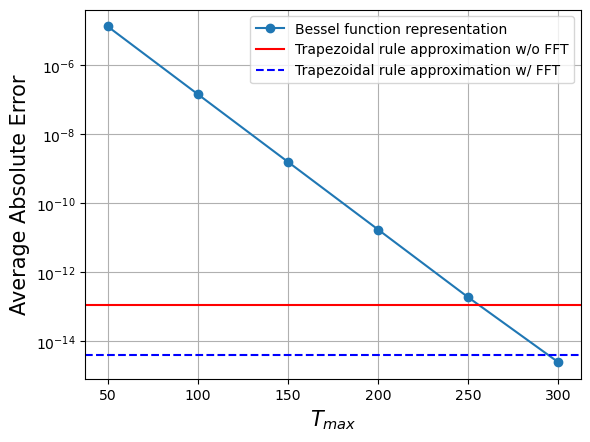

In [27]:
trap_mean = np.mean(np.abs(trap_vec - trap_true_vec))
fft_mean = np.mean(np.abs(fft_vec - trap_true_vec))
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, bessel_err,'-o', label="Bessel function representation")
plt.axhline(y=trap_mean, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=fft_mean, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)
ax = plt.gca()

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Average Absolute Error', fontsize=15)

#for i in range(len(bessel_int_level)):
#    if (i != len(bessel_int_level)-1 and i != 2):
#        plt.text(bessel_int_level_title[i], bessel_err[i]*2, "{:.1e}".format(bessel_err[i]))
#    else:
#        plt.text(bessel_int_level_title[i]-25000, bessel_err[i]*3, "{:.1e}".format(bessel_err[i]))
        #plt.text(bessel_int_level[i], bessel_err[i], str({}bessel_err[i]))

#plt.text(500000, trap_mean/3, "{:.1e}".format(trap_mean))
#plt.text(500000, fft_mean*1.5, "{:.1e}".format(fft_mean))
#plt.xlim([25, 600])
#plt.ylim([5e-15, 1e-5])
#plt.xlim([np.min(bessel_int_level_title)-25000, np.max(bessel_int_level_title)+40000])


#ax.set_yticks(np.logspace(-15, -2,14), minor=False)
#ax.set_yticks(np.logspace(-15, -2,141), minor=True)
g = plt.grid(visible = True, which='major')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2, 0.3, 0.4, 0.5,0.6, 0.7,0.8, 0.9),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#plt.grid(visible = True, which='minor', axis = 'both')

#g1 = ax.grid(visible=True, which='major', color='k', linestyle='-', linewidth=0.5)
#g2 = ax.grid(visible=True, which='minor', color='k', linestyle='-', linewidth=0.2)
plt.minorticks_off()


plt.savefig('Bessel_03_FFT_Trap/Bessel_error_03_Avg_no_text.pdf')

<Figure size 640x480 with 0 Axes>

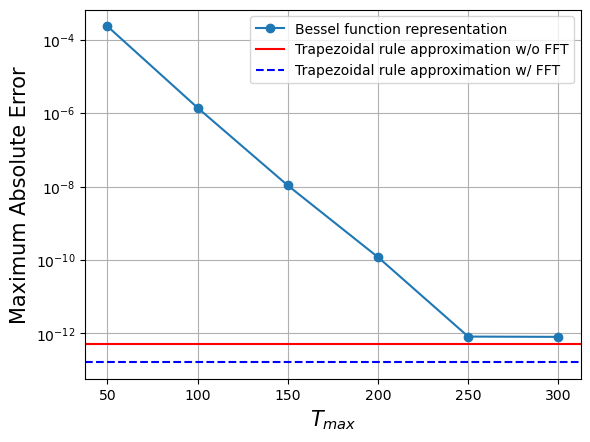

In [28]:
trap_mean = np.mean(np.abs(trap_vec - trap_true_vec))
fft_mean = np.mean(np.abs(fft_vec - trap_true_vec))
trap_inf = np.max(np.abs(trap_vec - trap_true_vec))
fft_inf = np.max(np.abs(fft_vec - trap_true_vec))
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, bessel_err_inf,'-o', label="Bessel function representation")
plt.axhline(y=trap_inf, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=fft_inf, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Maximum Absolute Error', fontsize=15)

#for i in range(len(bessel_int_level)):
#    if (~np.isnan(bessel_err[i]) and bessel_err_inf[i] > 2e-12):
#        plt.text(bessel_int_level_title[i]-20000, bessel_err_inf[i]*2.5, "{:.1e}".format(bessel_err_inf[i]))
#    else:
#        plt.text(bessel_int_level_title[i]-12000, bessel_err_inf[i]*3, "{:.1e}".format(bessel_err_inf[i]))
        #plt.text(bessel_int_level[i], bessel_err[i], str({}bessel_err[i]))

#plt.text(175, trap_mean*2, "{:.1e}".format(trap_mean))
#plt.xlim([25, 600])
#plt.text(300000, trap_inf/3, "{:.1e}".format(trap_inf))
#plt.text(300000, fft_inf*1.5, "{:.1e}".format(fft_inf))
#plt.ylim([1e-14, 1e-5])
#plt.xlim([np.min(bessel_int_level_title)-25000, np.max(bessel_int_level_title)+50000])
#plt.ylim([1e-14, 1e-3])


#ax.set_yticks(np.logspace(-15, -2,14), minor=False)
#ax.set_yticks(np.logspace(-15, -2,141), minor=True)
g = plt.grid(visible = True, which='both', axis='both')
#locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.1,0.2, 0.3, 0.4, 0.5,0.6, 0.7,0.8, 0.9),numticks=12)
#ax.yaxis.set_minor_locator(locmin)
#plt.grid(visible = True, which='minor', axis = 'both')

#g1 = ax.grid(visible=True, which='major', color='k', linestyle='-', linewidth=0.5)
#g2 = ax.grid(visible=True, which='minor', color='k', linestyle='-', linewidth=0.2)
plt.minorticks_off()


plt.savefig('Bessel_03_FFT_Trap/Bessel_error_03_inf_no_text.pdf')

<Figure size 640x480 with 0 Axes>

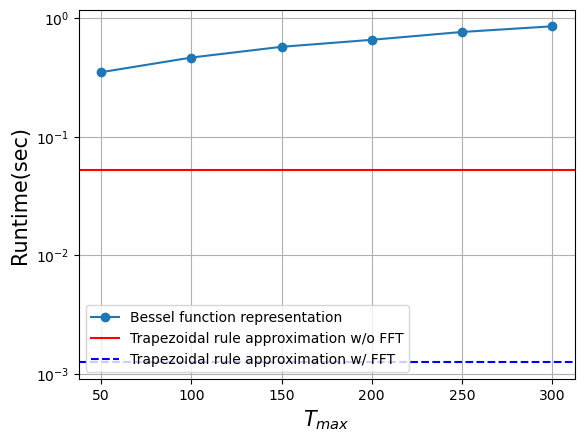

In [29]:
#bessel_int_sub = bessel_int_level[~np.isnan(bessel_err)]
#time_vec_arr = np.array(time_vec)
#bessel_time_sub = time_vec_arr[~np.isnan(bessel_err)]
plt.clf()
plt.figure()
plt.semilogy(bessel_int_level_title, time_vec,'-o', label="Bessel function representation")
plt.xticks(bessel_int_level_title, bessel_int_level)

plt.axhline(y=t_trap, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
plt.axhline(y=t_fft, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")

#for i in range(len(bessel_int_level)):
#    if (~np.isnan(bessel_err[i])):
#        plt.text(bessel_int_level_title[i]-20000, time_vec[i]-0.8, "{:.2f}".format(time_vec[i]))
        #plt.text(bessel_int_level[i], bessel_err[i], str({}bessel_err[i]))

#plt.text(300000, t_trap+0.15, "{:.3f}".format(t_trap))
#plt.text(300000, t_fft+0.1, "{:.3f}".format(t_fft))

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Runtime(sec)', fontsize=15)
#ax.set_yticks(np.logspace(-15, -2,14), minor=False)
#ax.set_yticks(np.logspace(-15, -2,141), minor=True)
plt.grid(visible = True, which='major')
#plt.grid(visible = True, which='minor', axis = 'both')

plt.minorticks_off()
plt.savefig('Bessel_03_FFT_Trap/Bessel_error_03_log_no_text.pdf')

<Figure size 640x480 with 0 Axes>

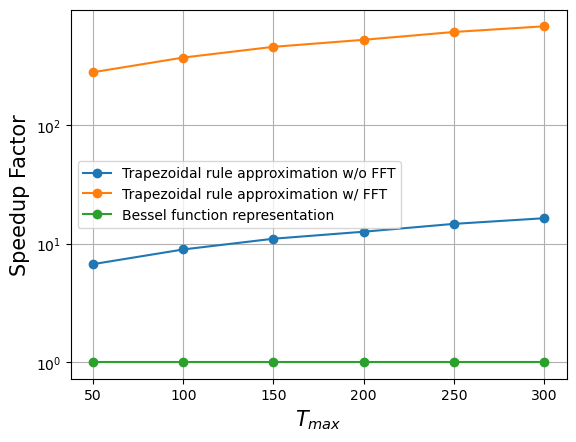

In [30]:
# Speed up
plt.clf()
plt.figure()
#plt.semilogy(bessel_int_level_title, time_vec,'-o', label="Bessel function representation")
fft_speedup = [i/t_fft for i in time_vec]
trap_speedup = [i/t_trap for i in time_vec]
bessel_speedup = [i/i for i in time_vec]
plt.semilogy(bessel_int_level_title, trap_speedup, '-o', label="Trapezoidal rule approximation w/o FFT")
plt.semilogy(bessel_int_level_title, fft_speedup, '-o', label="Trapezoidal rule approximation w/ FFT")
plt.xticks(bessel_int_level_title, bessel_int_level)

plt.semilogy(bessel_int_level_title, bessel_speedup,'-o', label="Bessel function representation")

#plt.axhline(y=t_trap, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
#plt.axhline(y=t_fft, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")

#for i in range(len(bessel_int_level)):
#    if (~np.isnan(bessel_err[i])):
#        plt.text(bessel_int_level_title[i]-20000, time_vec[i]-0.8, "{:.2f}".format(time_vec[i]))
        #plt.text(bessel_int_level[i], bessel_err[i], str({}bessel_err[i]))

#plt.text(300000, t_trap+0.15, "{:.3f}".format(t_trap))
#plt.text(300000, t_fft+0.1, "{:.3f}".format(t_fft))

plt.legend()
plt.xlabel(r'$T_{max}$', fontsize=15)
plt.ylabel(r'Speedup Factor', fontsize=15)
#ax.set_yticks(np.logspace(-15, -2,14), minor=False)
#ax.set_yticks(np.logspace(-15, -2,141), minor=True)
plt.grid(visible = True, which='major')
#plt.grid(visible = True, which='minor', axis = 'both')

plt.minorticks_off()
plt.savefig('Bessel_03_FFT_Trap/Bessel_error_03_speed_up.pdf')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

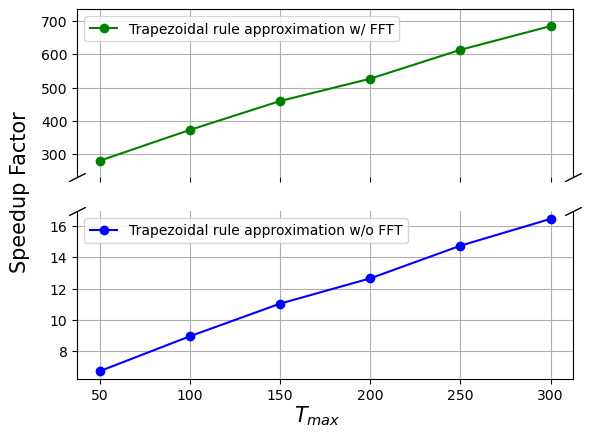

In [31]:
# Speed up using broken lines
plt.clf()
plt.figure()
#plt.semilogy(bessel_int_level_title, time_vec,'-o', label="Bessel function representation")
fft_speedup = [i/t_fft for i in time_vec]
trap_speedup = [i/t_trap for i in time_vec]
bessel_speedup = [i/i for i in time_vec]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(bessel_int_level_title, fft_speedup, '-o',color= 'g', label="Trapezoidal rule approximation w/ FFT")
ax2.plot(bessel_int_level_title, trap_speedup, '-o',color = 'b', label="Trapezoidal rule approximation w/o FFT")
#ax3.plot(bessel_int_level_title, bessel_speedup,'-o',color='r', label="Bessel function representation")

ax1.set_ylim(min(fft_speedup)-50, max(fft_speedup)+50)
ax2.set_ylim(min(trap_speedup)-0.5, max(trap_speedup)+0.5)
#ax3.set_ylim(min(bessel_speedup)-0.5, max(bessel_speedup)+0.5)

ax1.spines.bottom.set_visible(False)
#ax2.spines.bottom.set_visible(False)
#ax2.spines.top.set_visible(False)
ax2.spines.top.set_visible(False)

#ax1.xaxis.tick_top(False)
ax1.tick_params(labeltop=False, top=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
#ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
#ax2.plot([0, 1], [0, 0], transform=ax2.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

ax1.grid(visible = True, which='major')
ax2.grid(visible = True, which='major')
#ax3.grid(visible = True, which='major')

#plt.semilogy(bessel_int_level_title, trap_speedup, '-o', label="Trapezoidal rule approximation w/o FFT")
#plt.semilogy(bessel_int_level_title, fft_speedup, '-o', label="Trapezoidal rule approximation w/ FFT")
#plt.xticks(bessel_int_level_title, bessel_int_level)

#plt.semilogy(bessel_int_level_title, bessel_speedup,'-o', label="Bessel function representation")

#plt.axhline(y=t_trap, color='r', linestyle='-', label="Trapezoidal rule approximation w/o FFT")
#plt.axhline(y=t_fft, color='b', linestyle='--', label="Trapezoidal rule approximation w/ FFT")

#for i in range(len(bessel_int_level)):
#    if (~np.isnan(bessel_err[i])):
#        plt.text(bessel_int_level_title[i]-20000, time_vec[i]-0.8, "{:.2f}".format(time_vec[i]))
        #plt.text(bessel_int_level[i], bessel_err[i], str({}bessel_err[i]))

#plt.text(300000, t_trap+0.15, "{:.3f}".format(t_trap))
#plt.text(300000, t_fft+0.1, "{:.3f}".format(t_fft))

ax1.legend()
ax2.legend()
#ax3.legend()
fig.supxlabel(r'$T_{max}$', fontsize=15)
fig.supylabel(r'Speedup Factor', fontsize=15)
#ax.set_yticks(np.logspace(-15, -2,14), minor=False)
#ax.set_yticks(np.logspace(-15, -2,141), minor=True)
plt.grid(visible = True, which='major')
#plt.grid(visible = True, which='minor', axis = 'both')

plt.minorticks_off()
#plt.show()
plt.savefig('Bessel_03_FFT_Trap/Bessel_error_03_speed_up_broken_line_no_bessel.pdf')